In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error



In [10]:
# Load the dataset
data = pd.read_csv('insurance.csv')



In [11]:
# Explore the data
print(data.head())
print(data.info())
print(data.describe())



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [12]:
# Check for missing values
print(data.isnull().sum())



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [13]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)



In [14]:
# Correlation analysis
corr_matrix = data.corr()
print(corr_matrix['charges'].sort_values(ascending=False))



charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64


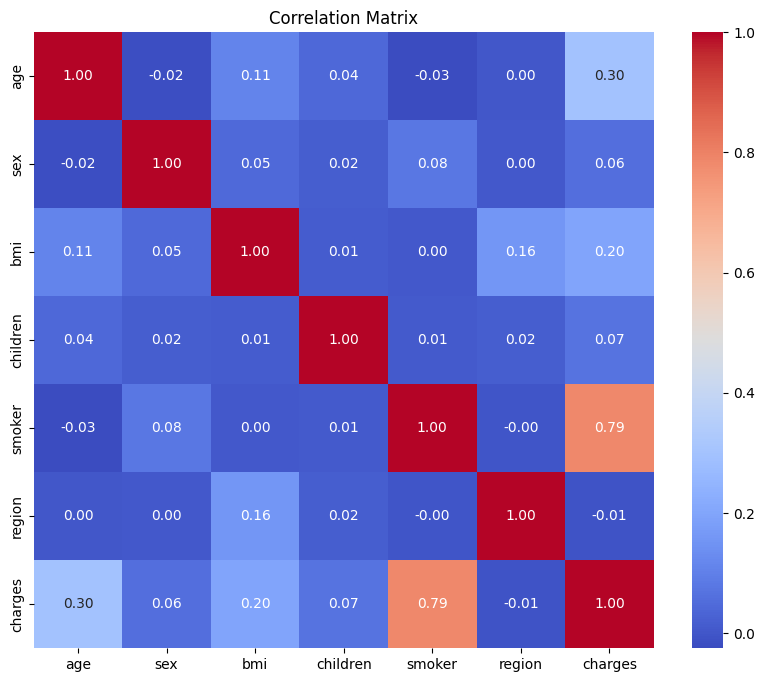

In [15]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



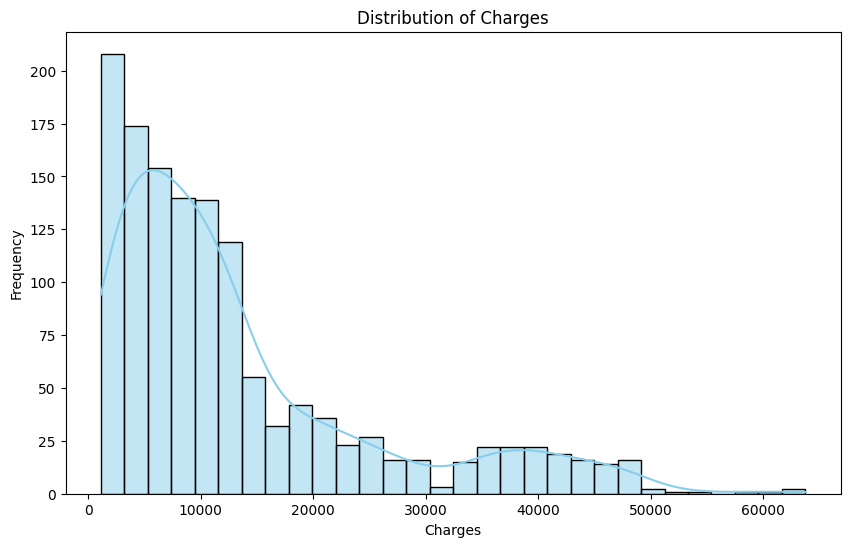

In [16]:
# Visualize distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

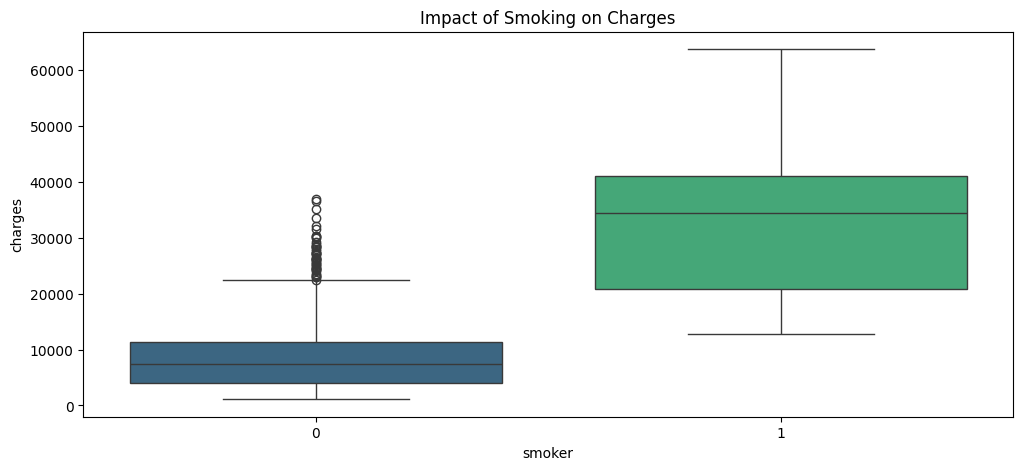

In [17]:
# Explore smoking impact on charges
plt.figure(figsize=(12, 5))
sns.boxplot(x='smoker', y='charges', data=data, palette='viridis', hue='smoker', legend = False)
plt.title('Impact of Smoking on Charges')
plt.show()

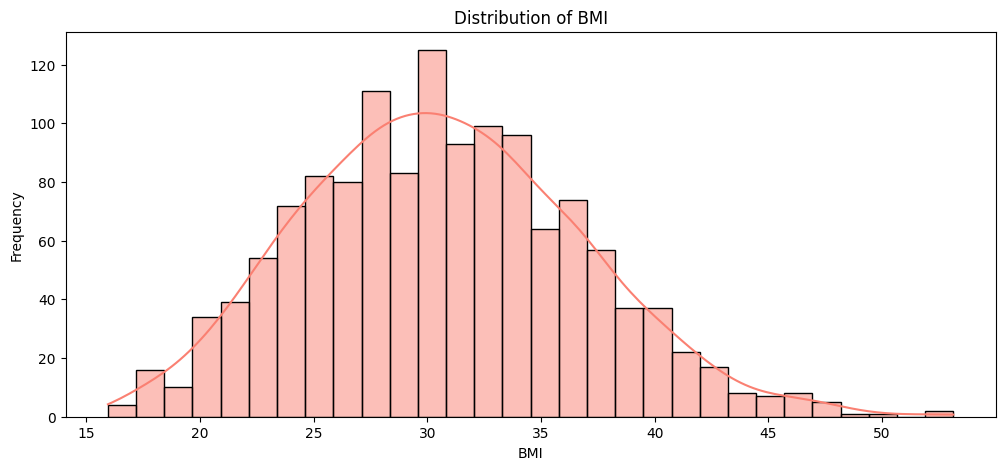

In [18]:
# Visualize BMI distribution
plt.figure(figsize=(12, 5))
sns.histplot(data['bmi'], bins=30, kde=True, color='salmon')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

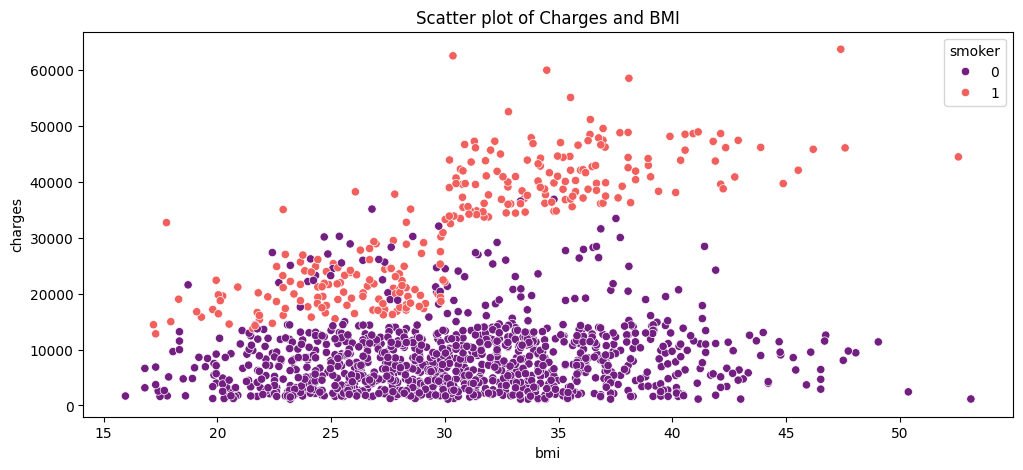

In [19]:
# Explore BMI impact on charges
plt.figure(figsize=(12, 5))
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker', palette='magma')
plt.title('Scatter plot of Charges and BMI')
plt.show()

In [20]:
# Create a linear regression model
X = data[['age', 'bmi', 'children', 'smoker']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [21]:
# Evaluate the linear regression model
y_pred_lr = lr_model.predict(X_test)

print(f"Linear Regression R2 Score: {r2_score(y_test, y_pred_lr)}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}")


Linear Regression R2 Score: 0.7811147722517886
Linear Regression MSE: 33981653.95019776


In [22]:
# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [23]:
# Evaluate the RandomForestRegressor model
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest R2 Score: {r2_score(y_test, y_pred_rf)}")
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")


Random Forest R2 Score: 0.8592035138495904
Random Forest MSE: 21858475.873350143


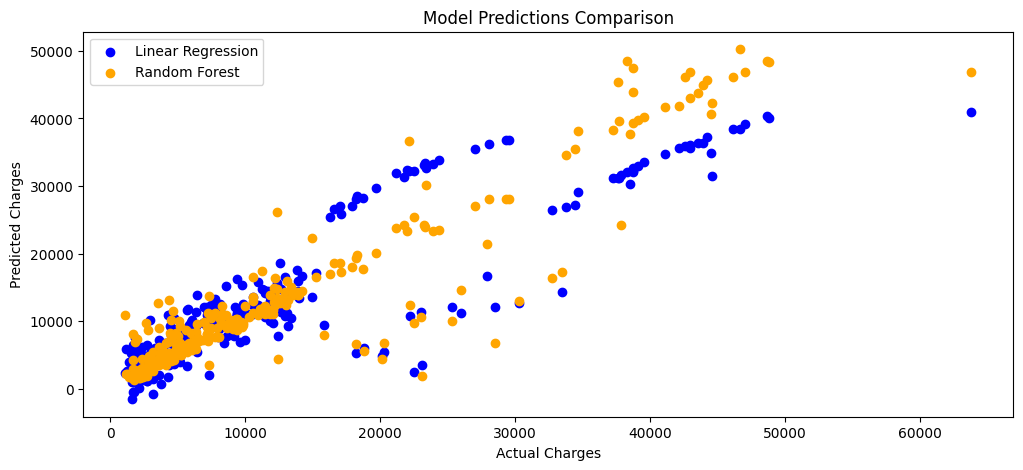

In [24]:
# Visualize model predictions
plt.figure(figsize=(12, 5))

plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='orange', label='Random Forest')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Model Predictions Comparison')
plt.legend()
plt.show()



Interpretation and Suggestions for Improvement:

1. Linear Regression Model:

    R2 Score: This score measures how well the linear regression model explains the variance in the target variable. A higher R2 score (closer to 1) indicates a better fit.
   
    MSE (Mean Squared Error): This metric quantifies the average squared difference between predicted and actual values. Lower MSE values are better.
        
2. RandomForestRegressor Model:

    The RandomForestRegressor provides an R2 score and MSE as well.

3. Interpretation:

    Compare the R2 scores and MSE values of both models. Lower MSE and higher R2 indicate better model performance.

    The scatter plot visualizes how well the models predict charges compared to the actual values.

5. Improvement Suggestions:

    Feature Scaling: Consider scaling numerical features if they have different scales.
   
    Feature Engineering: Explore creating new features or transforming existing ones.

    Hyperparameter Tuning: Optimize hyperparameters of the RandomForestRegressor for better performance.

    Cross-Validation: Use cross-validation for more robust model evaluation.


Feel free to adjust and expand the code based on your specific needs and further analysis.